## To create a comprehensive workflow of the sales data which has been obtained from Kaggle...

- **Data Import**
- **Data Cleaning and Transformation**
- **Exploratory Data Analysis (EDA)**
- **Data Visualization**

# 1. Data import

## Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# import our dataset
sales_datapath = 'sales_data_sample.csv'
sales_data = pd.read_csv(sales_datapath, encoding='latin1')

## Initial Inspection

In [6]:
# find the name of the columns
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
# Info about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# Handling and checking missing values


In [9]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
sales_data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
sales_data.TERRITORY.unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [12]:
sales_data.COUNTRY.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [13]:
sales_data.loc[sales_data['COUNTRY']=='Germany']

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
168,10191,21,100.00,3,3840.90,11/20/2003 0:00,Shipped,4,11,2003,...,Mehrheimerstr. 369,NaN,Koln,NaN,50739,Germany,EMEA,Pfalzheim,Henriette,Medium
177,10300,33,100.00,5,5521.89,10/4/2003 0:00,Shipped,4,10,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
178,10310,33,100.00,10,6934.62,10/16/2004 0:00,Shipped,4,10,2004,...,Mehrheimerstr. 369,NaN,Koln,NaN,50739,Germany,EMEA,Pfalzheim,Henriette,Medium
277,10230,43,100.00,1,7016.31,3/15/2004 0:00,Shipped,1,3,2004,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Large
298,10191,40,100.00,1,5590.00,11/20/2003 0:00,Shipped,4,11,2003,...,Mehrheimerstr. 369,NaN,Koln,NaN,50739,Germany,EMEA,Pfalzheim,Henriette,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,10296,34,100.00,11,3477.86,9/15/2004 0:00,Shipped,3,9,2004,...,Hansastr. 15,NaN,Munich,NaN,80686,Germany,EMEA,Donnermeyer,Michael,Medium
2576,10296,24,100.00,4,2441.04,9/15/2004 0:00,Shipped,3,9,2004,...,Hansastr. 15,NaN,Munich,NaN,80686,Germany,EMEA,Donnermeyer,Michael,Small
2679,10296,22,80.80,3,1777.60,9/15/2004 0:00,Shipped,3,9,2004,...,Hansastr. 15,NaN,Munich,NaN,80686,Germany,EMEA,Donnermeyer,Michael,Small
2758,10296,47,86.62,5,4071.14,9/15/2004 0:00,Shipped,3,9,2004,...,Hansastr. 15,NaN,Munich,NaN,80686,Germany,EMEA,Donnermeyer,Michael,Medium


## Filling the NaN value to make the dataset complete

In [15]:
sales_data['TERRITORY']=sales_data['TERRITORY'].fillna('Americas')

In [16]:
sales_data.isna().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

find all instances where territory is null and assign to variable
 
null_t = sales_data.loc[sales_data['TERRITORY'].isnull()]
 
#find impacted countries from null list
 
null_t.COUNTRY.unique()

## Replacing japan in territory to APAC

In [19]:
sales_data['TERRITORY']=sales_data['TERRITORY'].replace('Japan','APAC')

In [20]:
sales_data['TERRITORY'].unique()

array(['Americas', 'EMEA', 'APAC'], dtype=object)

## **Descriptive Statistics:** Summary statistics for numerical columns.

In [22]:
# Display the summary statistics of the numerical columns
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## **Descriptive Statistics:** Summary statistics for categorical columns.

In [24]:
# Display the summary statistics of the categorical columns
sales_data.describe(include=['O'])

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,2823,302,2823,1337,2747,2823,2823,2823,2823,2823
unique,252,6,7,109,92,91,92,9,73,16,73,19,3,77,72,3
top,11/14/2003 0:00,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,38,2617,967,52,259,259,259,55,304,416,259,1004,1407,259,259,1384


## 3. Exploratory Data Analysis (EDA)

Perform EDA to understand the dataset better:


- **Distribution Analysis:** Histograms, box plots.
- **Correlation Analysis:** Heatmap of correlations.

In [26]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

<Axes: >

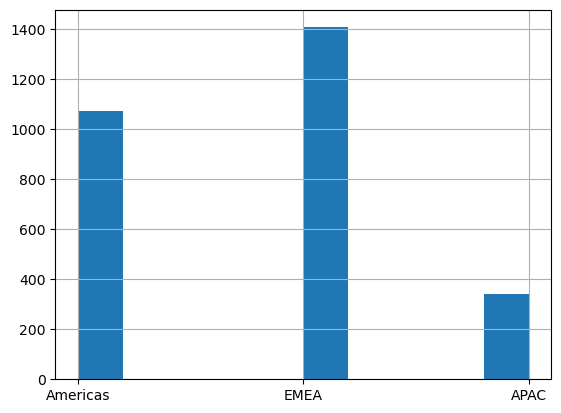

In [27]:
# distribution analysis
# Histogram

sales_data.TERRITORY.hist()


In [28]:
sales_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,Americas,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,Americas,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,Americas,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


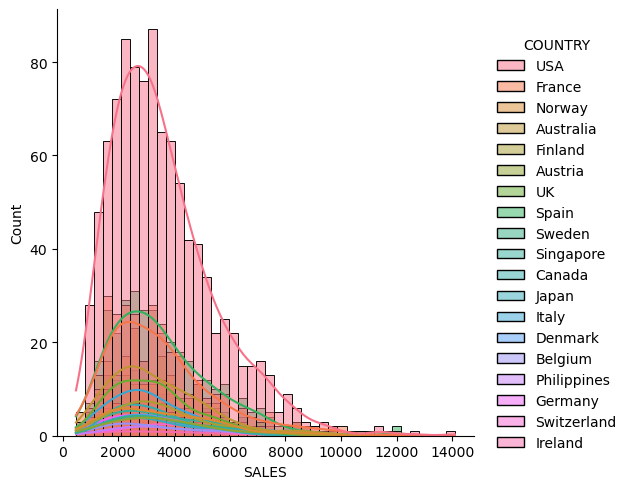

In [29]:
# Option 1: Distribution of SALES with countries distinguished by hue
sns.displot(data=sales_data, x="SALES", hue="COUNTRY", kde=True)
plt.show()

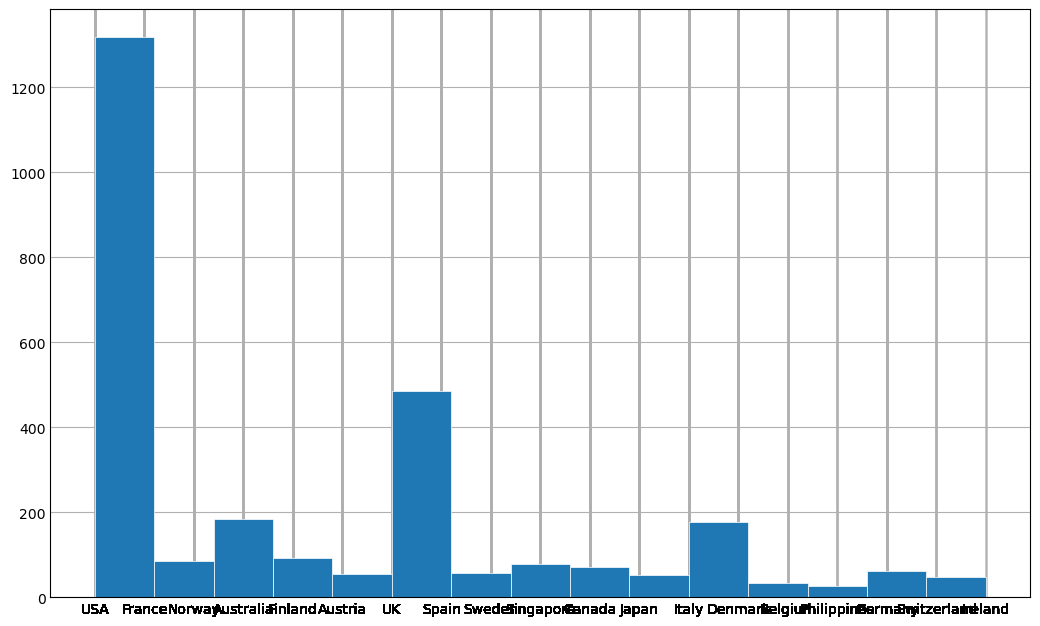

In [30]:
plt.style.use('_mpl-gallery')

# plot:

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(sales_data['COUNTRY'], bins=15, linewidth=0.5, edgecolor="white")
ax.set(xticks=sales_data['COUNTRY'])

plt.show()

C:\Users\clive\AppData\Local\Temp\ipykernel_20236\4294353354.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=sales_data, x='COUNTRY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')


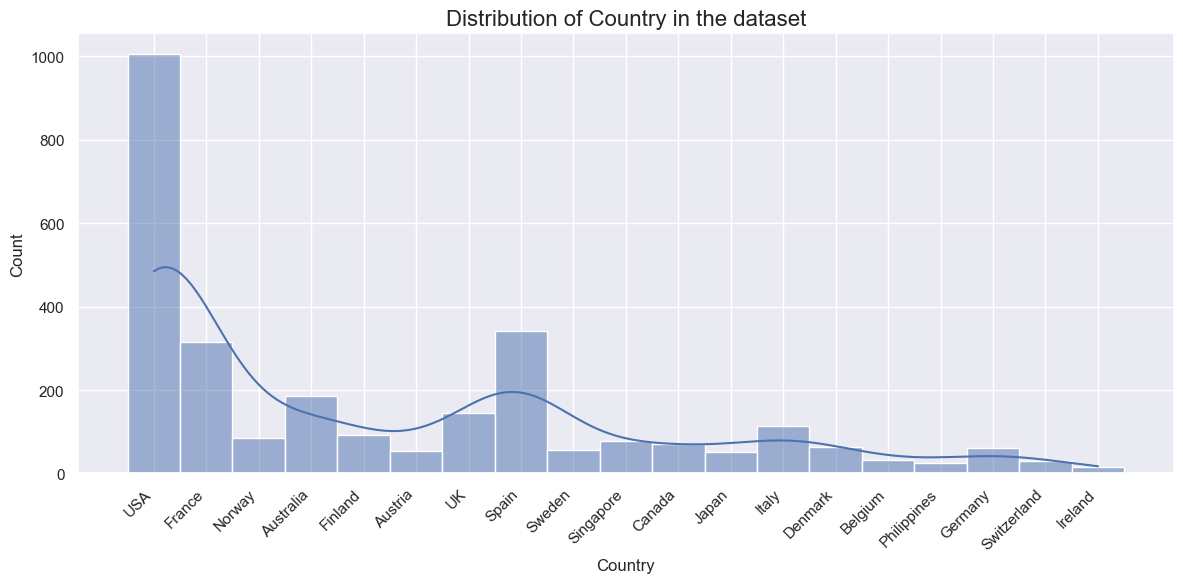

In [31]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.histplot(data=sales_data, x='COUNTRY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Distribution of Country in the dataset', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
sorted_sales=sales_data.sort_values(by='SALES', ascending=True)
sorted_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2249,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
1287,10407,6,90.19,3,541.14,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,Americas,Frick,Sue,Small
2044,10408,15,36.93,1,553.95,4/22/2005 0:00,Shipped,2,4,2005,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,APAC,Shimamura,Akiko,Small
1551,10280,20,28.88,12,577.60,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo,Small
1818,10419,15,42.67,7,640.05,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,10403,66,100.00,9,11886.60,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
1062,10412,60,100.00,9,11887.80,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
53,10424,50,100.00,6,12001.00,5/31/2005 0:00,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
744,10322,50,100.00,6,12536.50,11/4/2004 0:00,Shipped,4,11,2004,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,Americas,Young,Valarie,Large


C:\Users\clive\AppData\Local\Temp\ipykernel_20236\1137751019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_sales, x='COUNTRY', y='SALES', ax=ax, palette='viridis')


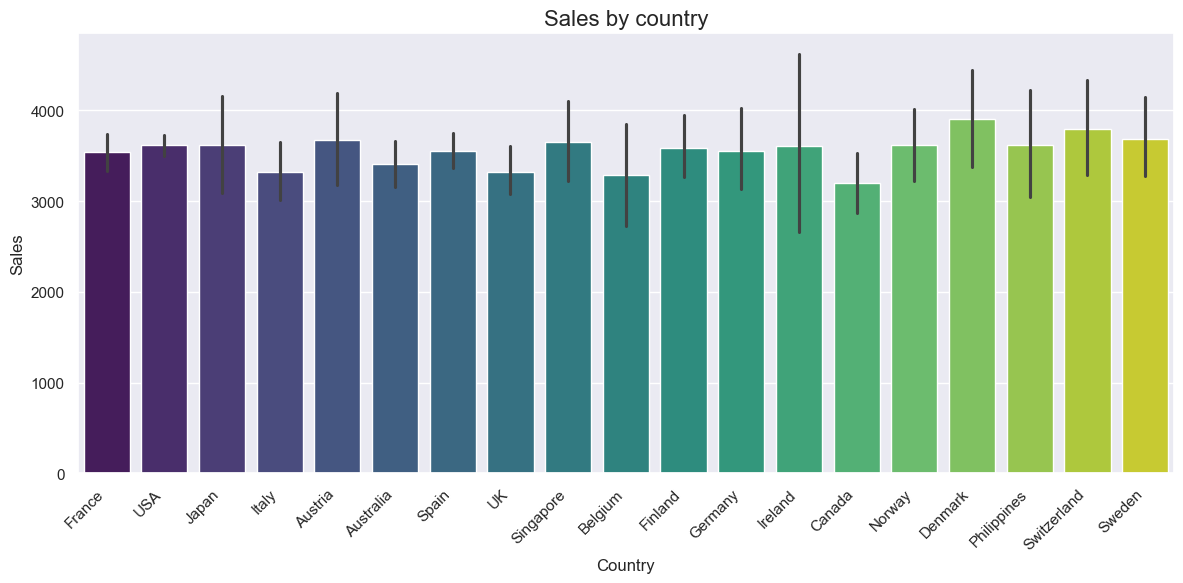

In [33]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=sorted_sales, x='COUNTRY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\clive\AppData\Local\Temp\ipykernel_20236\3065374410.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=sales_data, x='TERRITORY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')


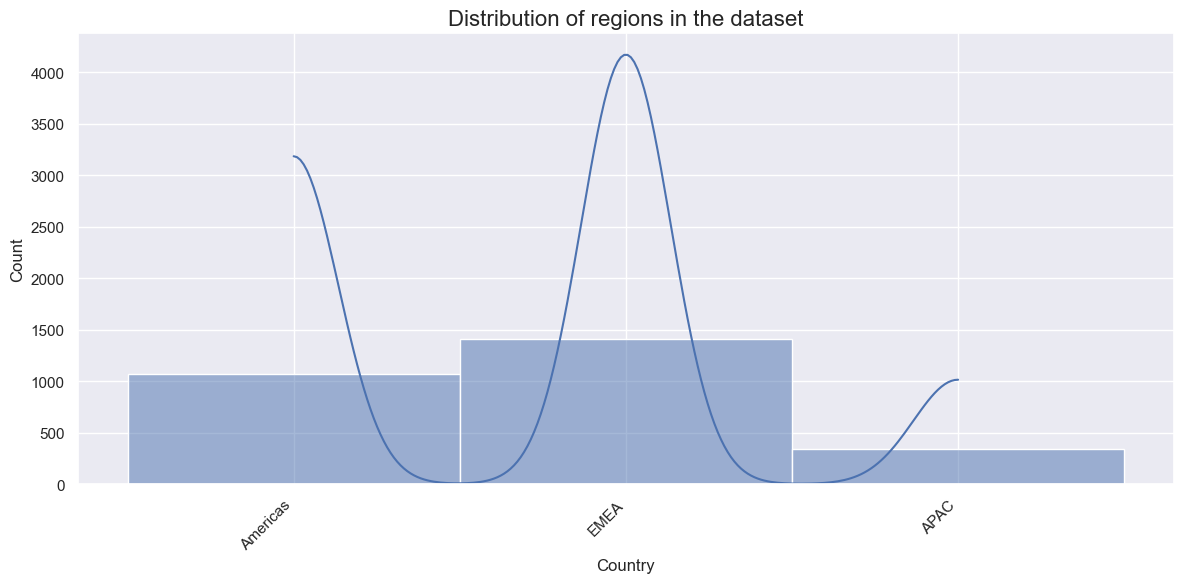

In [34]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.histplot(data=sales_data, x='TERRITORY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Distribution of regions in the dataset', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


# Analysis of the dataset

- What are the total sales over the past year?
- Which product has the highest sales?
- What is the average order value?
- How many unique customers made purchases?
- What is the sales trend over the past year?


In [37]:
# What are the total sales over the past year?

sales_data.YEAR_ID.unique()

array([2003, 2004, 2005], dtype=int64)

In [38]:
sales_2005=sales_data.loc[sales_data['YEAR_ID']==2005]
sales_2005

total_sales = sales_2005['SALES'].sum()
total_sales

1791486.71

In [39]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [40]:
# Which product has the highest sales? -----> Classic Cars
sales_data.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [41]:
product_sales = pd.DataFrame(sales_data.groupby('PRODUCTLINE')['SALES'].sum()).reset_index()
product_sales_sorted = product_sales.sort_values(by='SALES')

C:\Users\clive\AppData\Local\Temp\ipykernel_20236\2911308046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales_sorted, x='PRODUCTLINE', y='SALES', ax=ax, palette='viridis')


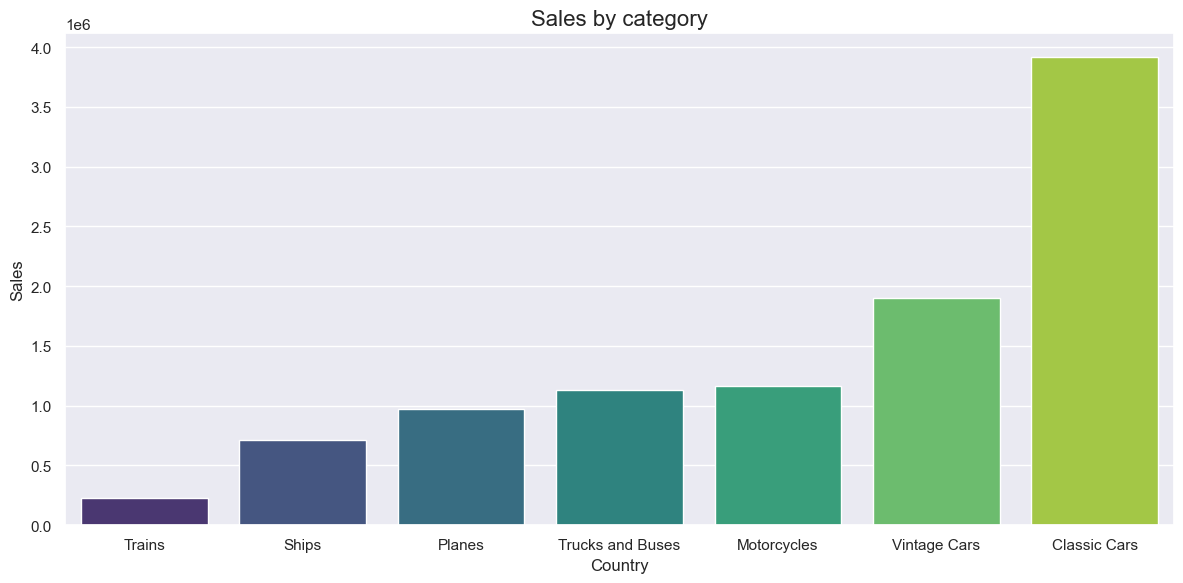

In [42]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the barplot
sns.barplot(data=product_sales_sorted, x='PRODUCTLINE', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by category', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
sales_data["SALES"].mean()

3553.889071909316

In [44]:
sales_data.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,Americas,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,Americas,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,Americas,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,Americas,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,Americas,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [45]:
order_ID_sales = pd.DataFrame(sales_data.groupby('ORDERNUMBER')['SALES'].mean()).reset_index()
order_ID_sales

,ORDERNUMBER,SALES
0,10100,3033.312500
1,10101,2858.085000
2,10102,3432.025000
3,10103,3418.875000
4,10104,3432.458462
...,...,...
302,10421,3630.875000
303,10422,3083.400000
304,10423,1682.390000
305,10424,5855.556667


C:\Users\clive\AppData\Local\Temp\ipykernel_20236\3828367579.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=order_ID_sales.head(20), x='ORDERNUMBER', y='SALES', ax=ax, palette='viridis')


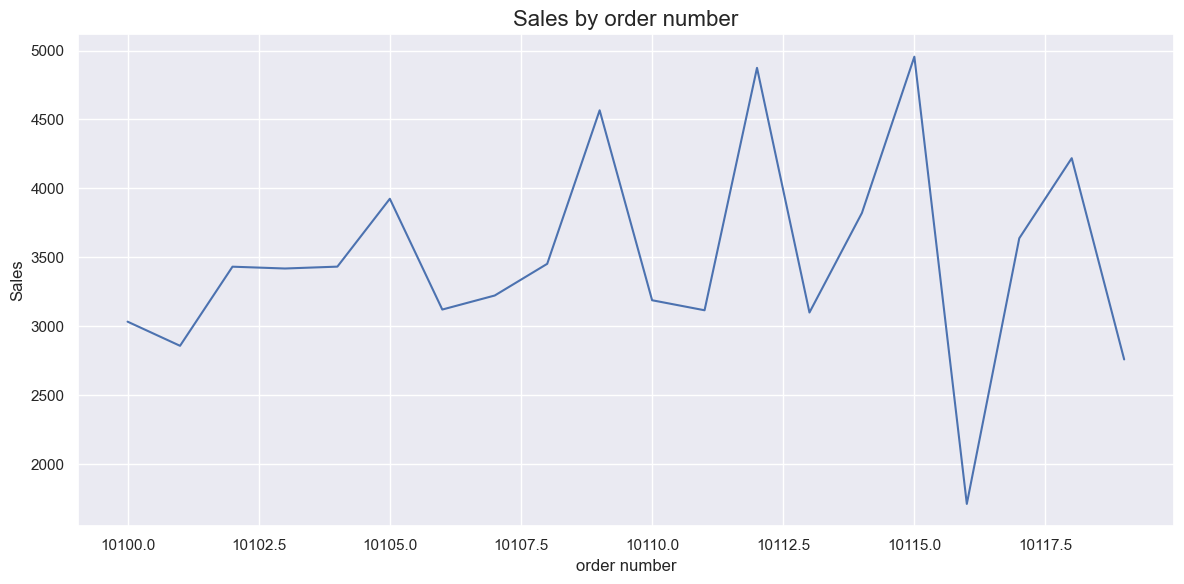

In [46]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.lineplot(data=order_ID_sales.head(20), x='ORDERNUMBER', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by order number', fontsize=16)
ax.set_xlabel('order number', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
# count of unique customers

sales_data['CUSTOMERNAME'].nunique()

92

In [48]:
sales_2004 = sales_data.loc[sales_data['YEAR_ID']==2004]
sales_2003 = sales_data.loc[sales_data['YEAR_ID']==2003]

In [49]:
monthly_sales_2005 = pd.DataFrame(sales_2005.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2005

,MONTH_ID,SALES
0,1,339543.42
1,2,358186.18
2,3,374262.76
3,4,261633.29
4,5,457861.06


C:\Users\clive\AppData\Local\Temp\ipykernel_20236\551385067.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales_2005, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')


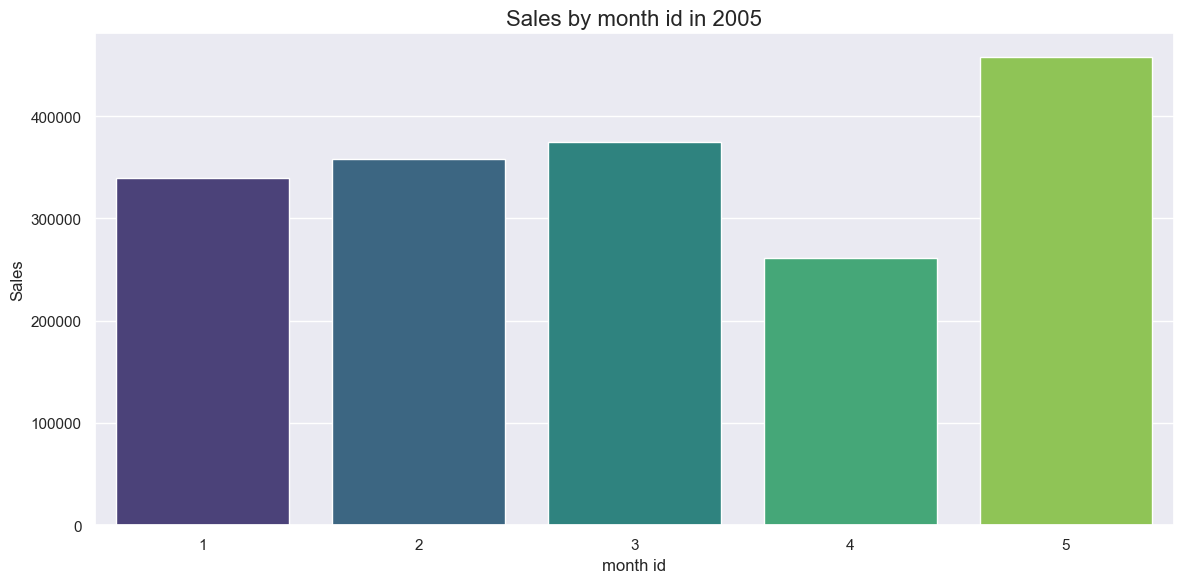

In [50]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=monthly_sales_2005, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2005', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
monthly_sales_2004 = pd.DataFrame(sales_2004.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2004

,MONTH_ID,SALES
0,1,316577.42
1,2,311419.53
2,3,205733.73
3,4,206148.12
4,5,273438.39
5,6,286674.22
6,7,327144.09
7,8,461501.27
8,9,320750.91
9,10,552924.25


In [52]:
monthly_sales_2003 = pd.DataFrame(sales_2003.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2003.sort_values(by='SALES')


,MONTH_ID,SALES
0,1,129753.60
1,2,140836.19
5,6,168082.56
2,3,174504.90
6,7,187731.88
4,5,192673.11
7,8,197809.30
3,4,201609.55
11,12,261876.46
8,9,263973.36


C:\Users\clive\AppData\Local\Temp\ipykernel_20236\2480306936.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales_2004, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')


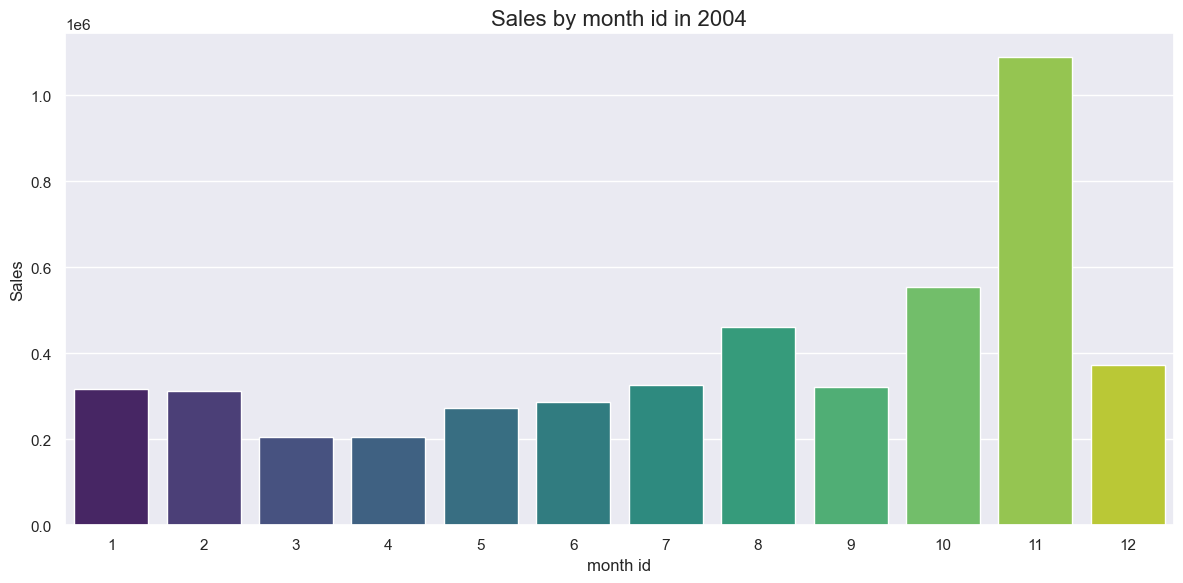

In [53]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=monthly_sales_2004, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2004', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
# Region generated the most sales

region_sales_2004 = pd.DataFrame(sales_2004.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2004.sort_values(by='SALES')

,TERRITORY,SALES
0,APAC,513786.93
1,Americas,1821246.78
2,EMEA,2389128.89


In [55]:
# Region generated the most sales

region_sales_2003 = pd.DataFrame(sales_2003.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2003.sort_values(by='SALES')

,TERRITORY,SALES
0,APAC,496907.63
1,Americas,1359757.38
2,EMEA,1660314.53


In [56]:
# Region generated the most sales

region_sales_2005 = pd.DataFrame(sales_2005.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2005.sort_values(by='SALES')

,TERRITORY,SALES
0,APAC,190600.49
1,Americas,671057.23
2,EMEA,929828.99


# Pivot tables in Pandas

> **Pivot tables is a powerful way to summarize and visualize data.** 

> **In Python, you can use the pandas library to create pivot tables, and then use visualization libraries like seaborn and matplotlib to plot the data.**

In [58]:
pivot_yearly_sales = sales_data.pivot_table(
                    values='SALES',
                    index='TERRITORY',
                    columns = 'YEAR_ID',
                    aggfunc='sum')


In [59]:
# Set of new columns
new_cols = ['Sales_2003','Sales_2004','Sales_2005']

# Assign new cols in the pivot table
pivot_yearly_sales.columns= new_cols



In [60]:
pivot_yearly_sales_1 = pivot_yearly_sales.reset_index()
pivot_yearly_sales_1

,TERRITORY,Sales_2003,Sales_2004,Sales_2005
0,APAC,496907.63,513786.93,190600.49
1,Americas,1359757.38,1821246.78,671057.23
2,EMEA,1660314.53,2389128.89,929828.99


ValueError: Could not interpret value `SALES` for `y`. An entry with this name does not appear in `data`.

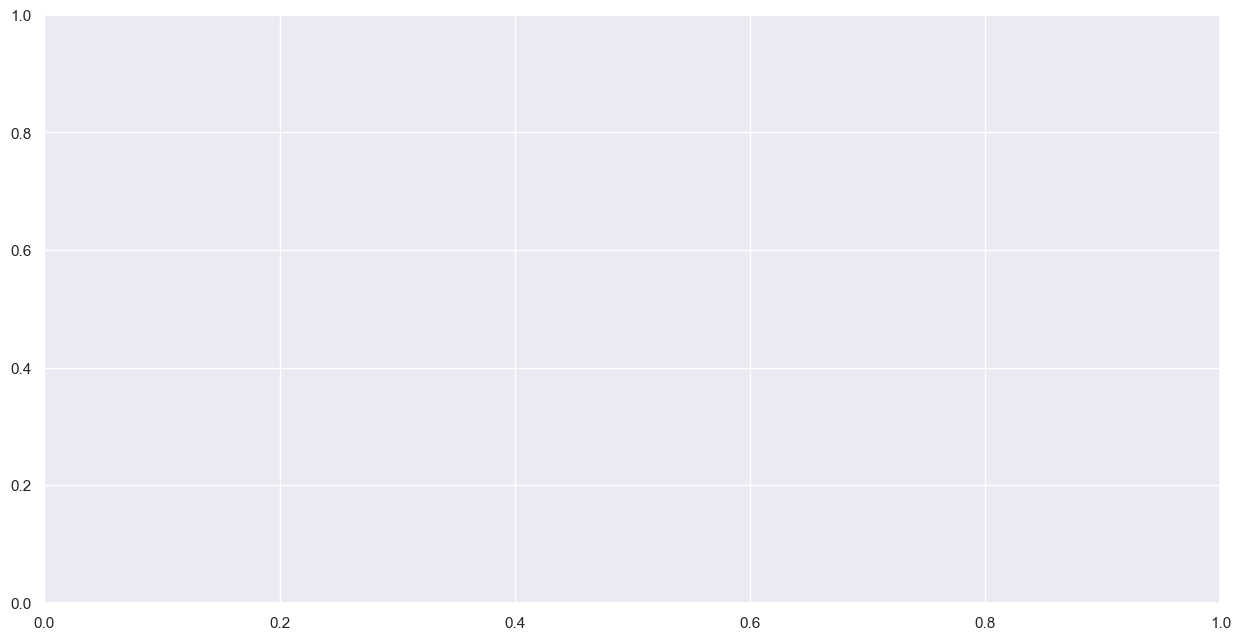

In [61]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the bar plot
sns.barplot(data=pivot_yearly_sales_1, x='TERRITORY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2004', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
pivot_yearly_sales.plot(kind='bar', figsize=(10,6))
plt.title('Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
pivot_yearly_sales.plot(kind='line', figsize=(10,6))
plt.title('Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
pivot_yearly_sales_2 = sales_data.pivot_table(
                    values='SALES',
                    index='TERRITORY',
                    columns = 'YEAR_ID',
                    aggfunc=['sum', 'mean', 'max', 'min'])
pivot_yearly_sales_2

In [ ]:
pivot_yearly_sales_2['mean'].plot(kind='bar', figsize=(10,6))
plt.title('Mean Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
RegionRevenuePerYear = sales_data['TERRITORY'].unique()

temp=pd.DataFrame()
 
for i, territory in enumerate(RegionRevenuePerYear):

    territorydata = sales_data[sales_data['TERRITORY'] == territory]

    territorydata = territorydata.groupby('YEAR_ID')['SALES'].sum().reset_index()

    territorydata['TERRITORY'] = territory

    temp = pd.concat([temp,territorydata], ignore_index=True)

plt.figure(figsize=(20,10))

plt.title("Region Revenue by Year")

a= sns.barplot(x='TERRITORY',y='SALES',data=temp,hue='YEAR_ID')

plt.xticks()

plt.show()
 